In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Reading and Visualising the data


In [2]:
# reading the dataset
data=pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# getting country names into one variable for future use
countries=data.country
countries

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [4]:
# finding the number of rows and cloumns
data.shape

(167, 10)

In [5]:
# checking the null rows if any
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# basics of country data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
# dropping the country column
data.drop('country', inplace=True, axis=1)

In [9]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Steps

>1. Data quality check
>2. EDA
>3. Outlier
>4. Scaling
>5. Hopkin's Test
>6. Find best value of k using SSD Elbow and silhoutte score method
>7. Using the final value of k, perform kMeans analysis
>8. Visualize using scatterplot
>9. Perform cluster profiling: __GDPP, __child_mort, __income.__
>10.Hierarchical clustering: single, 

Since the columns exports, health and imports are in percentage terms we need to convert the values

In [10]:
# 1. Data Quality check
# converting exports, health, imports columns from percentage to nmerical columns
data.exports=data.exports*data.gdpp/100

In [11]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,1145.20,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
data.health=data.health*data.gdpp/100
data.imports=data.imports*data.gdpp/100

In [13]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# 2. EDA: Univariate and Bivariate


In [14]:
data.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [15]:
col=list(data.columns)

In [16]:
col=col[1:]
col

['exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

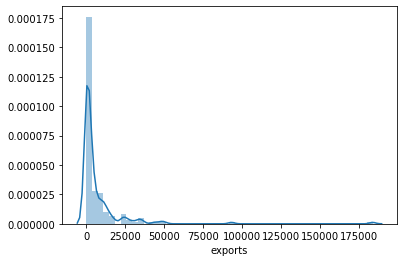

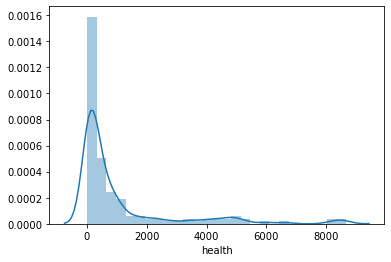

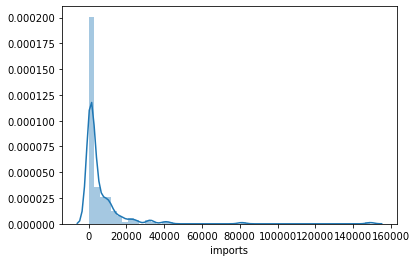

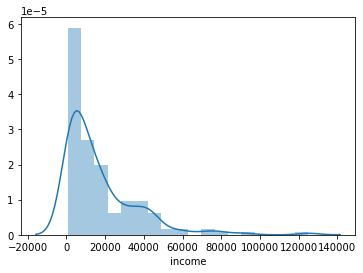

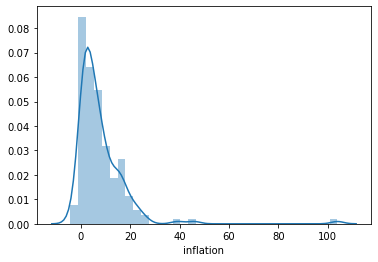

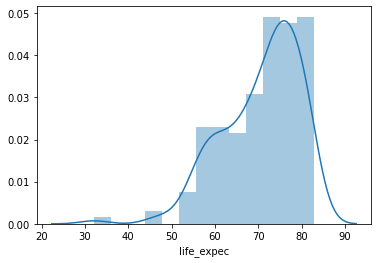

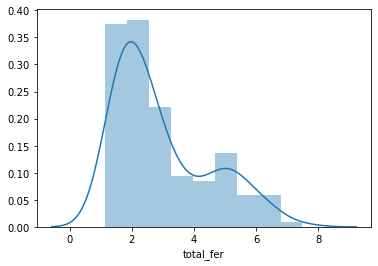

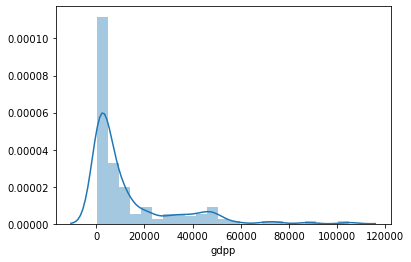

In [17]:
# Distribution of columns
for c in col:
    sns.distplot(data[c])
    plt.show()

In [18]:
data[col].corr()

,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
exports,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


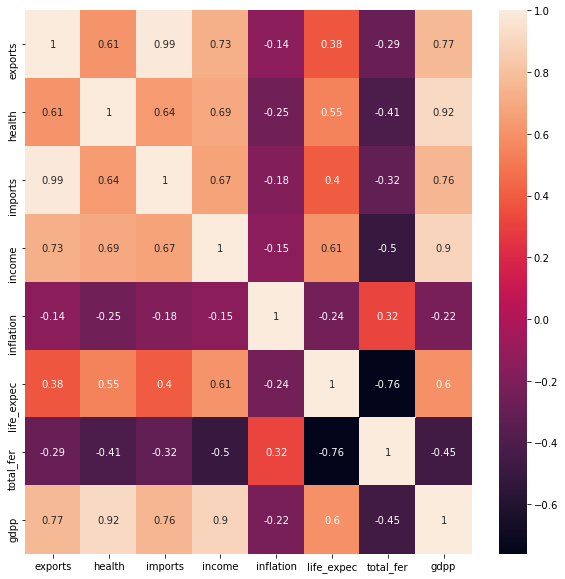

In [19]:
# plooting heat map for correaltion analysis
plt.figure(figsize=(10,10))
sns.heatmap(data[col].corr(),annot=True)
plt.show()

## Inferences of the above
- We can see that health and gdp has highest correlation, followed by gdpp & exports
- The least correlation is between life_expec & child_mort, followed by total_fer & life_expec

## Outliers

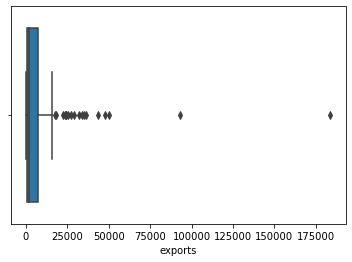

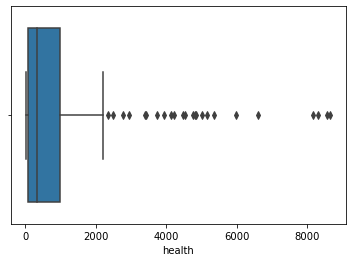

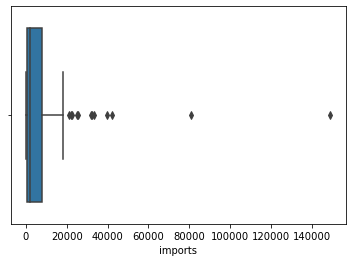

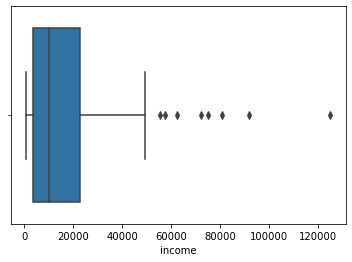

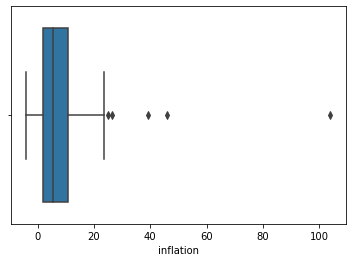

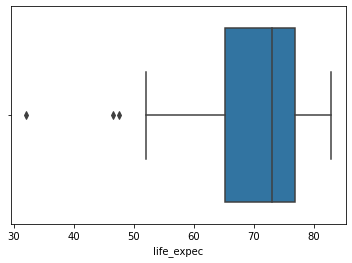

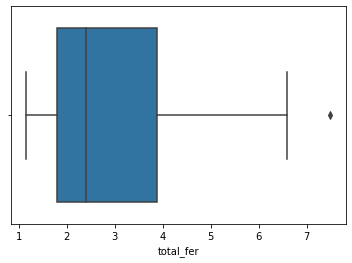

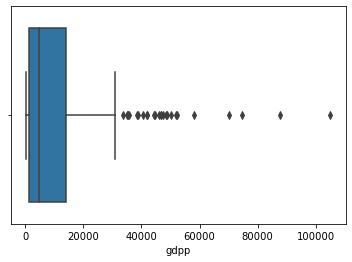

In [20]:
for c in col:
    sns.boxplot(data[c])
    plt.show()

Since we've less data we'll go with soft capping
For child_mort, inflation, total_fet we should not do anything to upper range outliers but we can cap the lower range outliers
For rest of the columns, we shpuld not do anythign with lower range outliers but we must deal woth upper e=range outliers

In [21]:
# Hopkins test will vive how differnet is our data from randomly scattered data
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [22]:
hopkins(data)

0.9802576943419756

## Scaling

In [23]:
scalar=StandardScaler()


In [24]:
col=data.columns

In [25]:
# performing fit_transform for the dataset
df1=scalar.fit_transform(data)

In [26]:
type(df1)


numpy.ndarray

In [27]:
# converting to dataframe
df1 = pd.DataFrame(df1)


In [28]:
df1.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [29]:
col

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [30]:
df1.columns = col
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Silhoutte Score

In [31]:

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])

sil = pd.DataFrame(ss)

In [32]:
sil

,0,1
0,2,0.458633
1,3,0.421862
2,4,0.427752
3,5,0.430775
4,6,0.405524
5,7,0.306891
6,8,0.285808
7,9,0.318079
8,10,0.257702


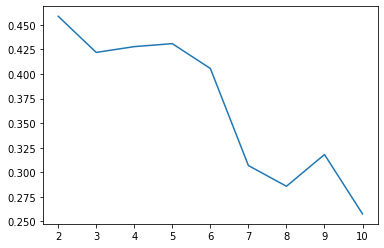

In [33]:
# plotting the silhoutte score values
plt.plot(sil[0], sil[1]);

Here the highest value of Silhoutte score is at 2 but it is never considered.
So the next highest value is at 5

# Perform the kMeans analysis

We will take k=5 and procced with the kmeans analysis

In [34]:
kmeans=KMeans(n_clusters=5, random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=5, random_state=0)

In [35]:
kmeans.cluster_centers_

array([[-0.82728286,  0.91964934,  1.64452729,  0.92999911,  1.53650234,
        -0.47824861,  1.11930356, -0.76611083,  1.70403909],
       [-0.43194718, -0.22514921, -0.3184781 , -0.21078481, -0.19030499,
        -0.12398412,  0.30715383, -0.47245508, -0.30912018],
       [ 0.48406464, -0.30854399, -0.41667584, -0.35184207, -0.3828263 ,
         5.24257153, -0.35967066,  0.46513754, -0.37234597],
       [ 1.30629603, -0.36469852, -0.52448663, -0.39220499, -0.69062463,
         0.20589948, -1.27930022,  1.34238878, -0.60545333],
       [-0.88216414,  9.83981418,  3.95419692,  9.71668122,  3.87899553,
        -0.39489794,  1.21178644, -0.87322392,  5.03650669]])

In [36]:
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 3,
       1, 0, 1, 3, 3, 1, 3, 0, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 0, 1,
       0, 1, 1, 1, 1, 3, 3, 1, 1, 0, 0, 3, 3, 1, 0, 3, 0, 1, 1, 3, 3, 1,
       3, 1, 0, 1, 1, 1, 3, 0, 0, 0, 1, 0, 1, 1, 3, 3, 0, 1, 3, 1, 1, 3,
       3, 1, 1, 4, 1, 3, 3, 1, 1, 3, 0, 3, 1, 1, 1, 2, 1, 1, 3, 1, 3, 1,
       0, 0, 3, 2, 0, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 0, 1, 0, 3, 3, 1, 0, 1, 1, 3, 1, 0, 0, 1, 3, 1, 3, 3, 1, 1, 1,
       1, 3, 1, 0, 0, 0, 1, 1, 1, 2, 1, 3, 3], dtype=int32)

In [37]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [38]:
data['labels']=kmeans.labels_

In [39]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,3
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,3
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [40]:
data.labels.value_counts()

1    86
3    47
0    30
2     3
4     1
Name: labels, dtype: int64

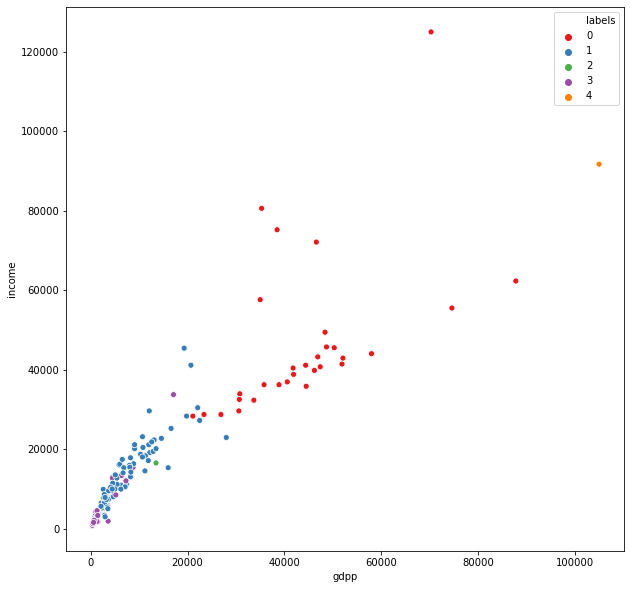

In [41]:
# Visualize using scatter plot
plt.figure(figsize=(10,10))
sns.scatterplot(x='gdpp', y='income', hue= 'labels', data=data, palette='Set1')
plt.show()

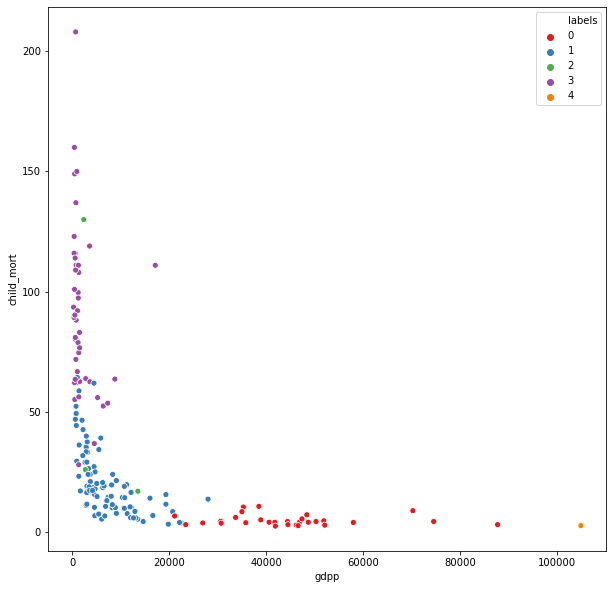

In [42]:
# Visualize using scatter plot
plt.figure(figsize=(10,10))
sns.scatterplot(x='gdpp', y='child_mort', hue= 'labels', data=data, palette='Set1')
plt.show()

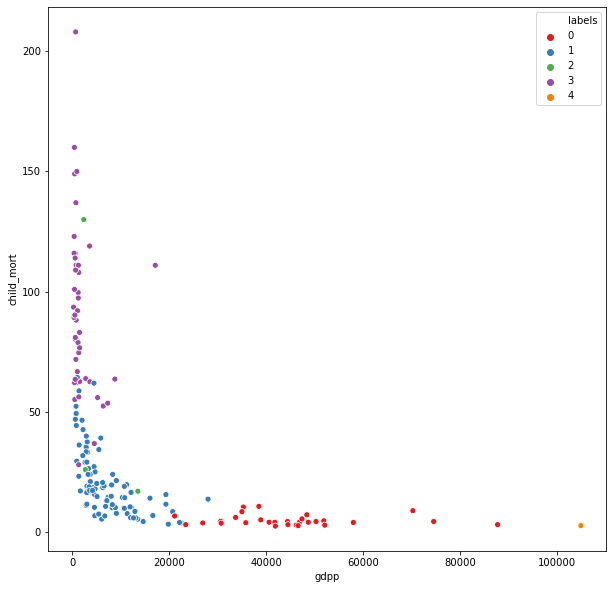

In [43]:
# Visualize using scatter plot
plt.figure(figsize=(10,10))
sns.scatterplot(x='gdpp', y='child_mort', hue= 'labels', data=data, palette='Set1')
plt.show()

# Perform the kMeans analysis

We will take k=4 and procced with the kmeans analysis

In [44]:
kmeans=KMeans(n_clusters=4, random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=4, random_state=0)

In [45]:
kmeans.cluster_centers_

array([[-0.43155282, -0.22621889, -0.31950613, -0.21319838, -0.19193913,
        -0.04618906,  0.30079929, -0.46763474, -0.30817542],
       [ 1.32661038, -0.36504233, -0.52444743, -0.39281661, -0.68923797,
         0.39181237, -1.27627565,  1.3543418 , -0.60496339],
       [-0.8253904 ,  0.78629938,  1.68609375,  0.78692193,  1.49089076,
        -0.46912792,  1.11066975, -0.75145085,  1.69932786],
       [-0.88216414,  7.31330621,  2.19664845,  7.39795921,  3.36911695,
        -0.56882323,  1.29073525, -1.03223716,  3.43858583]])

In [46]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [47]:
data['labels1']=kmeans.labels_

In [48]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,labels1
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,3,1
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,0
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,0
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,3,1
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,0


In [49]:
data.labels1.value_counts()

0    88
1    48
2    29
3     2
Name: labels1, dtype: int64

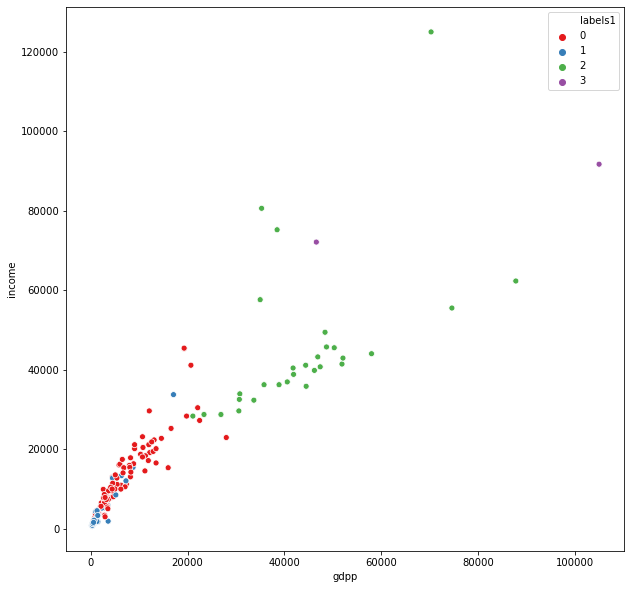

In [50]:
# Visualize using scatter plot
plt.figure(figsize=(10,10))
sns.scatterplot(x='gdpp', y='income', hue= 'labels1', data=data, palette='Set1')
plt.show()

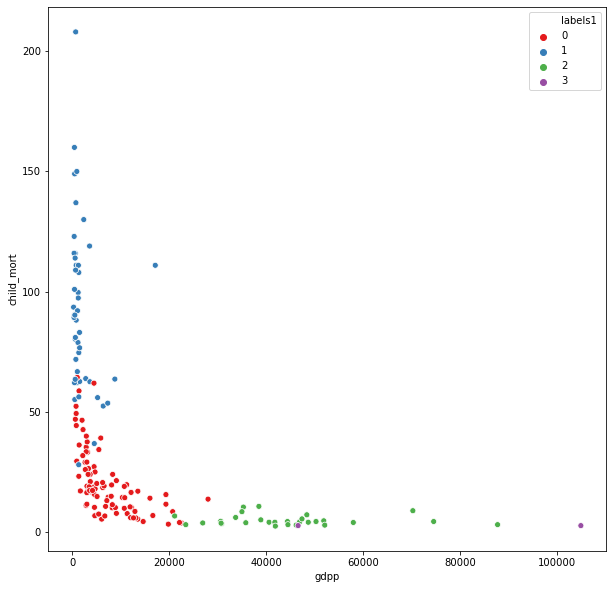

In [51]:
# Visualize using scatter plot
plt.figure(figsize=(10,10))
sns.scatterplot(x='gdpp', y='child_mort', hue= 'labels1', data=data, palette='Set1')
plt.show()

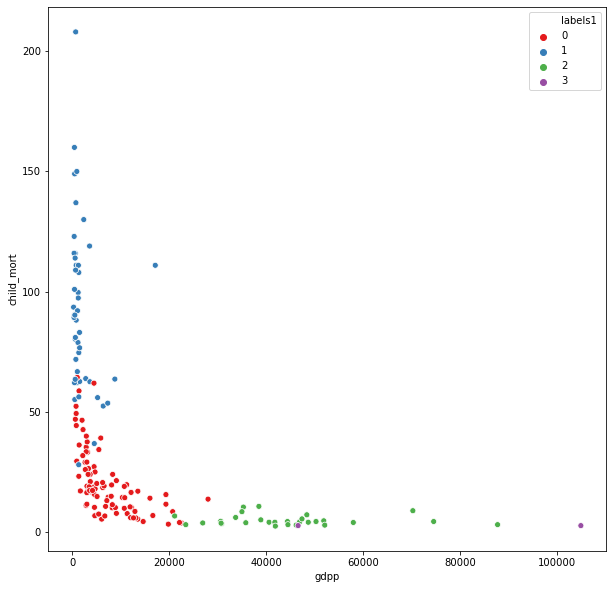

In [52]:
# Visualize using scatter plot
plt.figure(figsize=(10,10))
sns.scatterplot(x='gdpp', y='child_mort', hue= 'labels1', data=data, palette='Set1')
plt.show()

# Perform the kMeans analysis

We will take k=3 and procced with the kmeans analysis

In [53]:
kmeans=KMeans(n_clusters=3, random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [54]:
kmeans.cluster_centers_

array([[ 1.32661038, -0.36504233, -0.52444743, -0.39281661, -0.68923797,
         0.39181237, -1.27627565,  1.3543418 , -0.60496339],
       [-0.82629395,  1.31794823,  1.82094465,  1.3111162 ,  1.71870094,
        -0.45233422,  1.12317044, -0.78661849,  1.92353171],
       [-0.44550624, -0.21297273, -0.28365905, -0.1962204 , -0.16527697,
        -0.0674905 ,  0.32760944, -0.47234163, -0.27275434]])

In [55]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [56]:
data['labels2']=kmeans.labels_

In [57]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,labels1,labels2
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,3,1,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,0,2
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,0,2
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,3,1,0
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,0,2


In [58]:
data.labels2.value_counts()

2    91
0    48
1    28
Name: labels2, dtype: int64

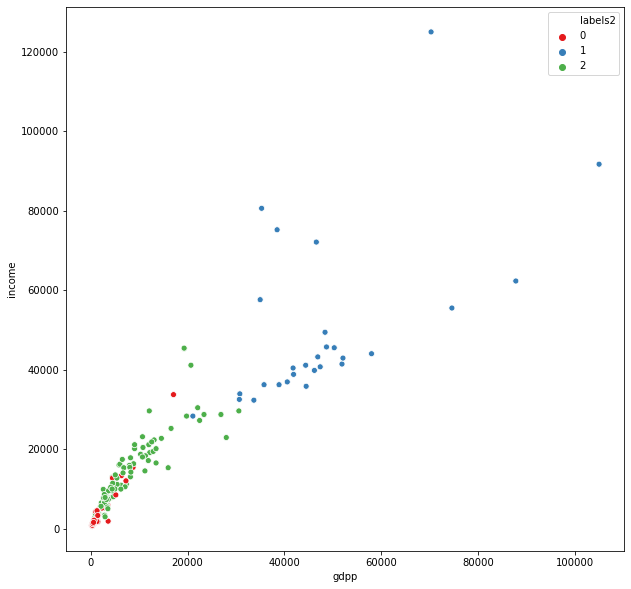

In [59]:
# Visualize using scatter plot
plt.figure(figsize=(10,10))
sns.scatterplot(x='gdpp', y='income', hue= 'labels2', data=data, palette='Set1')
plt.show()

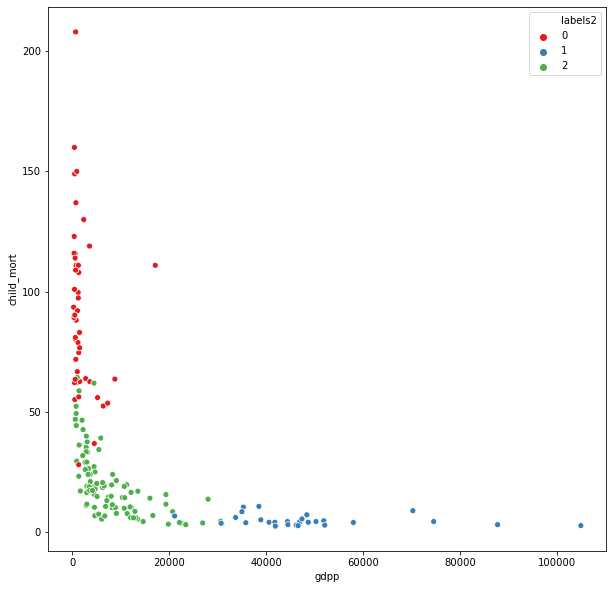

In [60]:
# Visualize using scatter plot
plt.figure(figsize=(10,10))
sns.scatterplot(x='gdpp', y='child_mort', hue= 'labels2', data=data, palette='Set1')
plt.show()

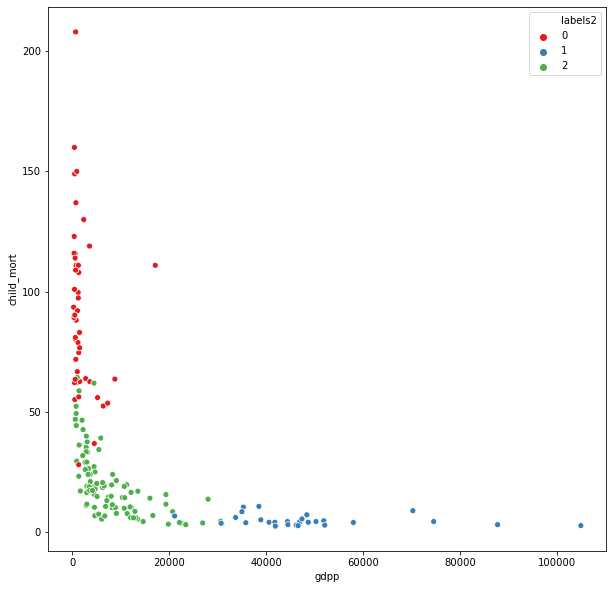

In [61]:
# Visualize using scatter plot
plt.figure(figsize=(10,10))
sns.scatterplot(x='gdpp', y='child_mort', hue= 'labels2', data=data, palette='Set1')
plt.show()

# Perform Cluster profiling: 

We are required to find one such cluster that is having __LOW GDPP, LOW INCOME and HIGH CHILD_MORT.__

In [62]:
data[['gdpp','income','child_mort','labels']].groupby('labels').mean()

,gdpp,income,child_mort
labels,,,
0,44103.333333,46676.666667,5.006667
1,7315.372093,13486.976744,20.902326
2,6160.000000,9786.666667,57.733333
3,1900.255319,3870.702128,90.793617
4,105000.000000,91700.000000,2.800000


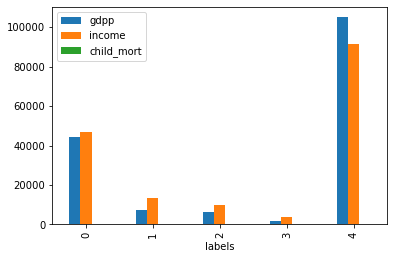

In [63]:
# bar plot for k=5
data[['gdpp','income','child_mort','labels']].groupby('labels').mean().plot(kind='bar')
plt.show()

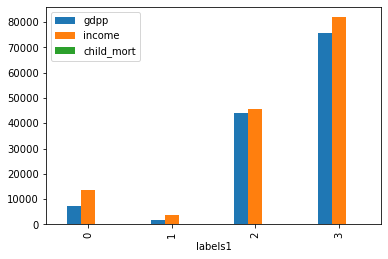

In [64]:
# bar plot for k=4
data[['gdpp','income','child_mort','labels1']].groupby('labels1').mean().plot(kind='bar')
plt.show()

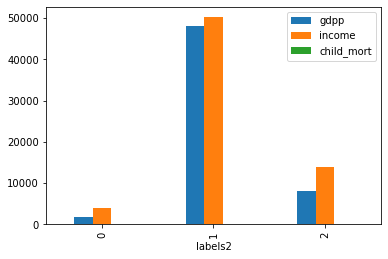

In [65]:
# bar plot for k=3
data[['gdpp','income','child_mort','labels2']].groupby('labels2').mean().plot(kind='bar')
plt.show()

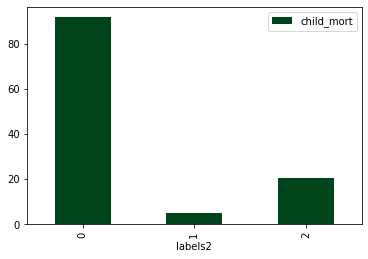

In [66]:
# bar plot of child_mort for k=3
data[['child_mort','labels2']].groupby('labels2').mean().plot(kind='bar',colormap='Greens_r')
plt.show()

## Inferences

- For the number of clusters=3, in cluster 0 we can see that child mortality is high, gdpp and income is very less
- So we can select the cluster 0 for our final reference

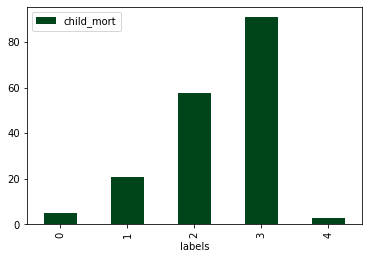

In [67]:
# bar plot of child_mort for k=5
data[['child_mort','labels']].groupby('labels').mean().plot(kind='bar',colormap='Greens_r')
plt.show()

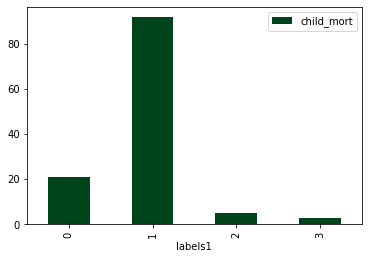

In [68]:
# bar plot of child_mort for k=4
data[['child_mort','labels1']].groupby('labels1').mean().plot(kind='bar',colormap='Greens_r')
plt.show()

## Inferences
- By seeing the above plots we can see that when we select number of clusters= 5 , then the count of countries in the cluster label 2 and 3 is very less compared to the cluster label 4
- Similarly we can see that when we select number of clusters=4, then the count of countries in the cluster label 0 and 1 are less compared to cluster label 3
- So by the above inferences we can finally select the number of clusters =3

# Hierarchial Clustering: Single linkage, Complete Linkage

In [69]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


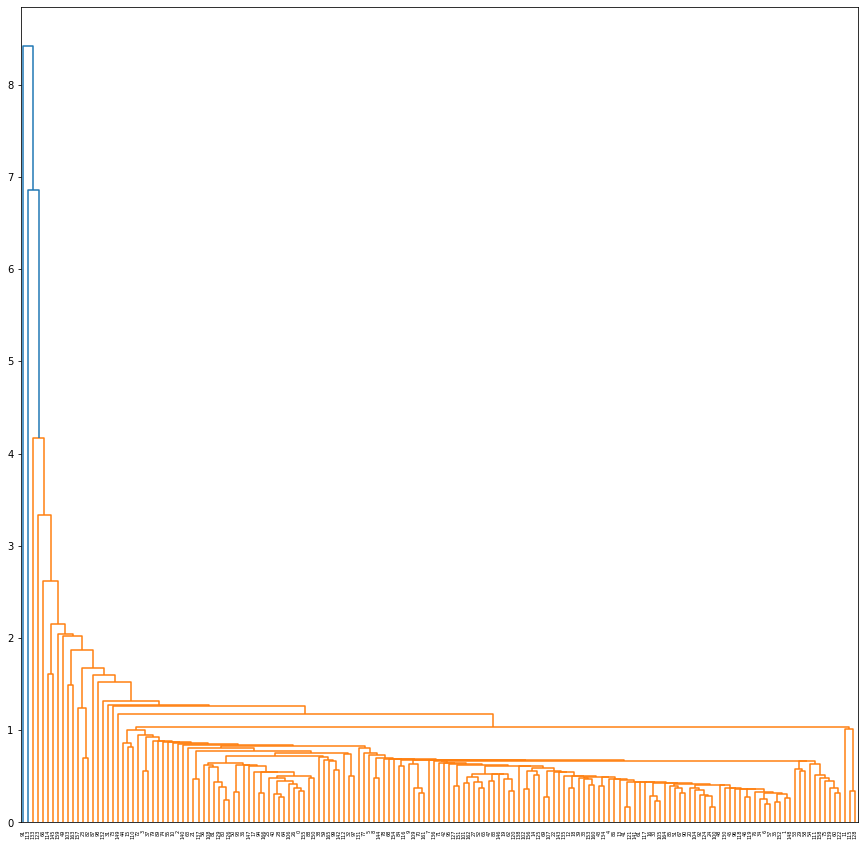

In [70]:
# single linkage
plt.figure(figsize=(15,15))
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

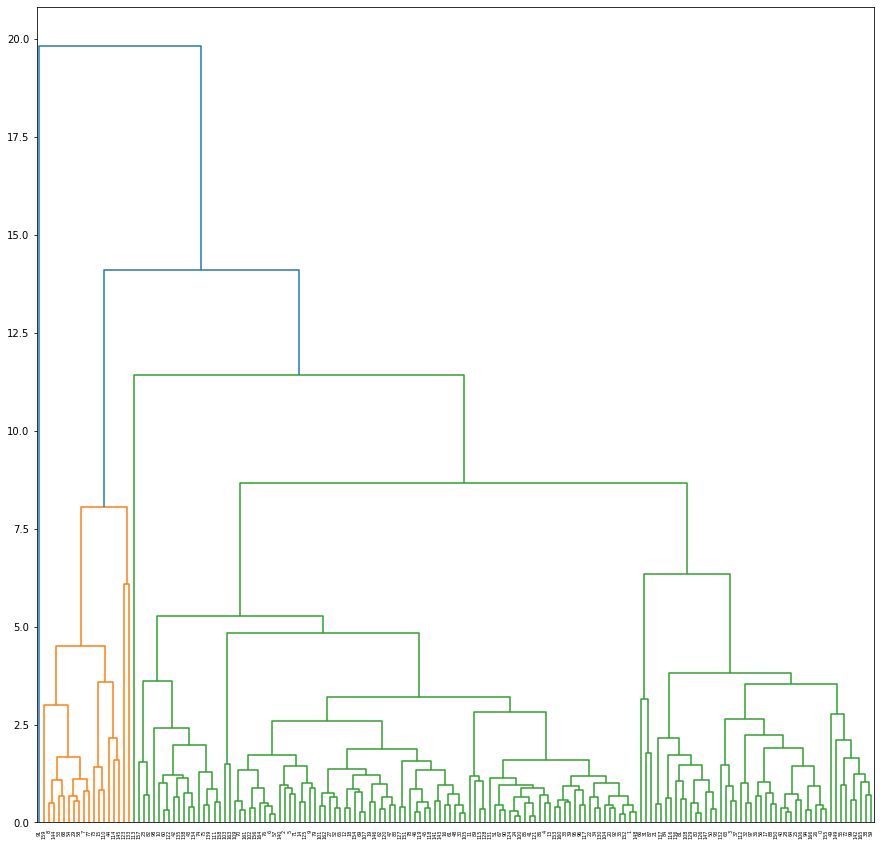

In [71]:
# complete linkage
plt.figure(figsize=(15,15))
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [72]:
# 3 clusters
cluster_labels_3 = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels_3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [73]:
# 4 clusters
cluster_labels_4 = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels_4

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [74]:
# 5 clusters
cluster_labels_5 = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels_5

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 4, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0])

In [75]:
# assign cluster labels
df1['cluster_labels_3'] = cluster_labels_3
df1['cluster_labels_4'] = cluster_labels_4
df1['cluster_labels_5'] = cluster_labels_5
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_labels_5
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0,0,0
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0,0,1
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0,0,1
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0,0,0
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0,0,1


## For clusters=3

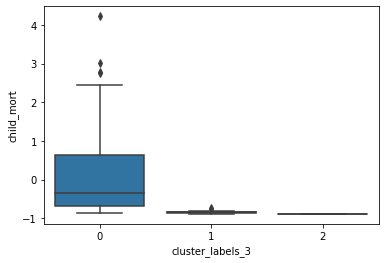

In [76]:
# box plots
sns.boxplot(x=df1.cluster_labels_3, y=df1.child_mort)
plt.show()

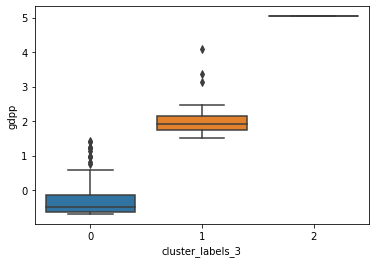

In [77]:
sns.boxplot(x=df1.cluster_labels_3, y=df1.gdpp)
plt.show()

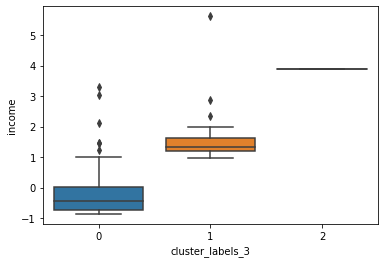

In [78]:
sns.boxplot(x=df1.cluster_labels_3, y=df1.income)
plt.show()

## For clusters=4

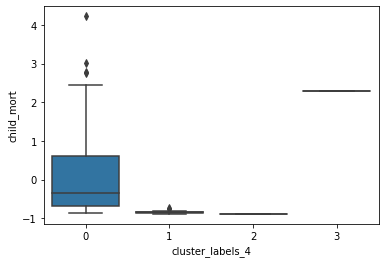

In [79]:
sns.boxplot(x=df1.cluster_labels_4, y=df1.child_mort)
plt.show()

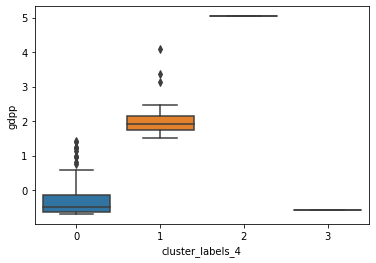

In [80]:
sns.boxplot(x=df1.cluster_labels_4, y=df1.gdpp)
plt.show()

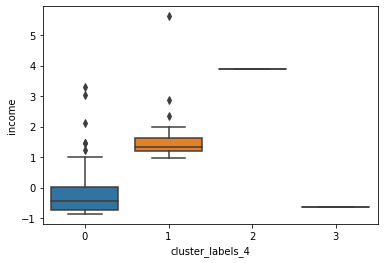

In [81]:
sns.boxplot(x=df1.cluster_labels_4, y=df1.income)
plt.show()

## For clusters=5

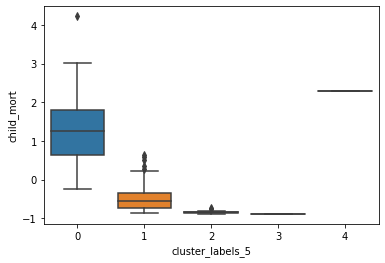

In [82]:
sns.boxplot(x=df1.cluster_labels_5, y=df1.child_mort)
plt.show()

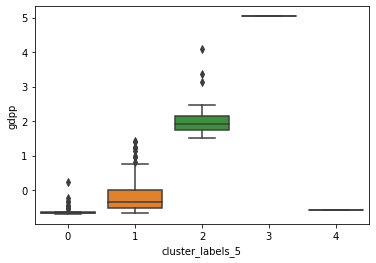

In [83]:
sns.boxplot(x=df1.cluster_labels_5, y=df1.gdpp)
plt.show()

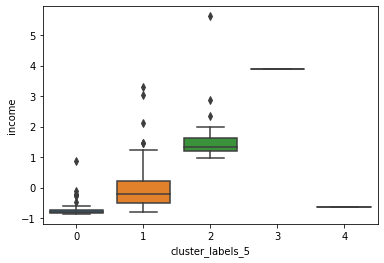

In [84]:
sns.boxplot(x=df1.cluster_labels_5, y=df1.income)
plt.show()

Inferences
- From the above we can see that the distance between the clusters is maximum when the cluster count =3

## Final Conclusion

The number of clusters k=3
 

In [85]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,labels1,labels2
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,3,1,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,0,2
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,0,2
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,3,1,0
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,0,2


In [86]:
# loading the final result into final_data
final_data=data[['child_mort','income','gdpp','labels2']]
final_data.head()

,child_mort,income,gdpp,labels2
0,90.2,1610,553,0
1,16.6,9930,4090,2
2,27.3,12900,4460,2
3,119.0,5900,3530,0
4,10.3,19100,12200,2


In [87]:
# appending country column to the final dataset
final_data['country']=countries

<ipython-input-87-7c0fecf6df48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['country']=countries


In [88]:
final_data.head()

,child_mort,income,gdpp,labels2,country
0,90.2,1610,553,0,Afghanistan
1,16.6,9930,4090,2,Albania
2,27.3,12900,4460,2,Algeria
3,119.0,5900,3530,0,Angola
4,10.3,19100,12200,2,Antigua and Barbuda


In [89]:
# seperating the data of cluster 0 to the new dataframe
c1=final_data[final_data['labels2']==0]

In [90]:
# sorting the countries list in the order of high child_mort, low income, low gdpp
sortedList=c1.sort_values(by=['child_mort','income','gdpp'],ascending=['False','True','True'])
sortedList

,child_mort,income,gdpp,labels2,country
136,28.1,1780,1290,0,Solomon Islands
72,36.9,12700,4500,0,Iraq
21,52.5,13300,6350,0,Botswana
137,53.7,12000,7280,0,South Africa
50,55.2,1420,482,0,Eritrea
108,56.0,8460,5190,0,Namibia
165,56.3,4480,1310,0,Yemen
93,62.2,1390,413,0,Madagascar
80,62.2,2480,967,0,Kenya
149,62.6,1850,3600,0,Timor-Leste


In [91]:
# printing the top 5 countries which were in dire need of help
list(sortedList.country)[:5]

['Solomon Islands', 'Iraq', 'Botswana', 'South Africa', 'Eritrea']

# Finally we can say that the above listed countries in sortedList are in dire need of help

-> The top 5 countries that are dire need of help are 
1. Solomon Islands
2. Iraq
3. Botswana
4. South Africa
5. Eritrea